In [53]:
#Import Libraries and depencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [81]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow_internal', [dirname(__file__)])
  File "c:\users\aptus\appdata\local\programs\python\python36-32\lib\imp.py", line 297, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow_internal'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 20, in swig_import_helper
    import _pywrap_tensorflow_internal
ModuleNotFoundError: No module named '_pywrap_tensorflow_internal'


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [54]:
#Read data
data=pd.read_csv("bhubaneswar_2018.csv")
data.head()

,Unnamed: 0,date,temp,dew_pt,hum,wind_spd,wind_gust,dir,vis,pressure,...,precip,precip_rate,precip_total,cond,fog,rain,snow,hail,thunder,tornado
0,1,2018-01-01 02:30:00,69,64,80,2.3,NaN,NNW,1,29.87,...,NaN,NaN,NaN,Haze,0,0,0,0,0,0
1,2,2018-01-01 05:30:00,68,65,87,4.6,NaN,NNW,1,29.84,...,NaN,NaN,NaN,Haze,0,0,0,0,0,0
2,3,2018-01-01 08:30:00,71,64,71,6.9,NaN,NW,1,29.92,...,NaN,NaN,NaN,Haze,0,0,0,0,0,0
3,4,2018-01-01 11:30:00,79,69,64,4.6,NaN,East,2,29.89,...,NaN,NaN,NaN,Haze,0,0,0,0,0,0
4,5,2018-01-01 14:30:00,79,64,51,6.9,NaN,ENE,2,29.82,...,NaN,NaN,NaN,Scattered Clouds,0,0,0,0,0,0


In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2386.0,1193.500000,688.923194,1.0,597.25,1193.50,1789.75,2386.00
temp,2386.0,81.512992,6.284189,57.0,79.00,82.00,86.00,96.00
dew_pt,2386.0,75.326907,6.912724,45.0,72.25,78.00,80.00,86.00
hum,2386.0,77.823135,13.678601,15.0,70.00,81.00,88.00,100.00
wind_spd,2385.0,5.174046,4.674843,0.0,2.30,4.60,6.90,66.70
wind_gust,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vis,2386.0,1.594300,0.497070,0.0,1.00,2.00,2.00,2.00
pressure,2365.0,29.728651,0.171509,29.3,29.59,29.75,29.87,30.14
wind_chill,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heat_index,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
data.isnull().sum()

Unnamed: 0         0
date               0
temp               0
dew_pt             0
hum                0
wind_spd           1
wind_gust       2386
dir              468
vis                0
pressure          21
wind_chill      2386
heat_index      2386
precip          2386
precip_rate     2386
precip_total    2386
cond             270
fog                0
rain               0
snow               0
hail               0
thunder            0
tornado            0
dtype: int64

In [57]:
#Remove columns with 80% NA values
data=data.loc[:, data.isnull().mean() < .8]
data.head()

,Unnamed: 0,date,temp,dew_pt,hum,wind_spd,dir,vis,pressure,cond,fog,rain,snow,hail,thunder,tornado
0,1,2018-01-01 02:30:00,69,64,80,2.3,NNW,1,29.87,Haze,0,0,0,0,0,0
1,2,2018-01-01 05:30:00,68,65,87,4.6,NNW,1,29.84,Haze,0,0,0,0,0,0
2,3,2018-01-01 08:30:00,71,64,71,6.9,NW,1,29.92,Haze,0,0,0,0,0,0
3,4,2018-01-01 11:30:00,79,69,64,4.6,East,2,29.89,Haze,0,0,0,0,0,0
4,5,2018-01-01 14:30:00,79,64,51,6.9,ENE,2,29.82,Scattered Clouds,0,0,0,0,0,0


In [58]:
data.isnull().sum()

Unnamed: 0      0
date            0
temp            0
dew_pt          0
hum             0
wind_spd        1
dir           468
vis             0
pressure       21
cond          270
fog             0
rain            0
snow            0
hail            0
thunder         0
tornado         0
dtype: int64

In [59]:
#drop unneccessary columns
data=data.drop(axis=0,columns=['tornado','hail','thunder','snow','fog','Unnamed: 0','dir','cond'])
data.head()

,date,temp,dew_pt,hum,wind_spd,vis,pressure,rain
0,2018-01-01 02:30:00,69,64,80,2.3,1,29.87,0
1,2018-01-01 05:30:00,68,65,87,4.6,1,29.84,0
2,2018-01-01 08:30:00,71,64,71,6.9,1,29.92,0
3,2018-01-01 11:30:00,79,69,64,4.6,2,29.89,0
4,2018-01-01 14:30:00,79,64,51,6.9,2,29.82,0


In [60]:
data_old=data.copy()

date         0
temp         0
dew_pt       0
hum          0
wind_spd     1
vis          0
pressure    21
rain         0
dtype: int64

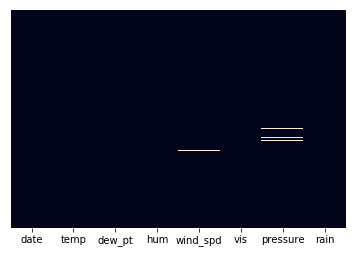

In [61]:
#Check Missing Values
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
data.isnull().sum()

date        0
temp        0
dew_pt      0
hum         0
wind_spd    0
vis         0
pressure    0
rain        0
dtype: int64

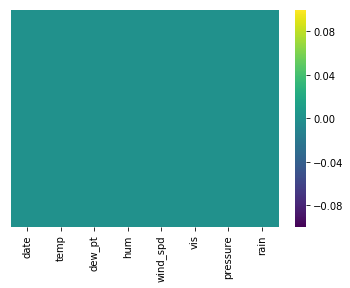

In [62]:
#Remove Missing Values
data[['pressure','wind_spd']]=data[['pressure','wind_spd']].rolling(12,center=True,min_periods=1).mean()
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')
data.isnull().sum()

In [63]:
data.isnull().sum()

date        0
temp        0
dew_pt      0
hum         0
wind_spd    0
vis         0
pressure    0
rain        0
dtype: int64

In [65]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,2386.0,81.512992,6.284189,57.000,79.000000,82.000000,86.000000,96.000000
dew_pt,2386.0,75.326907,6.912724,45.000,72.250000,78.000000,80.000000,86.000000
hum,2386.0,77.823135,13.678601,15.000,70.000000,81.000000,88.000000,100.000000
wind_spd,2386.0,5.175296,3.373453,0.675,3.075000,4.275000,6.516667,35.566667
vis,2386.0,1.594300,0.497070,0.000,1.000000,2.000000,2.000000,2.000000
pressure,2386.0,29.727110,0.166535,29.365,29.589091,29.747917,29.868125,30.088333
rain,2386.0,0.059514,0.236633,0.000,0.000000,0.000000,0.000000,1.000000


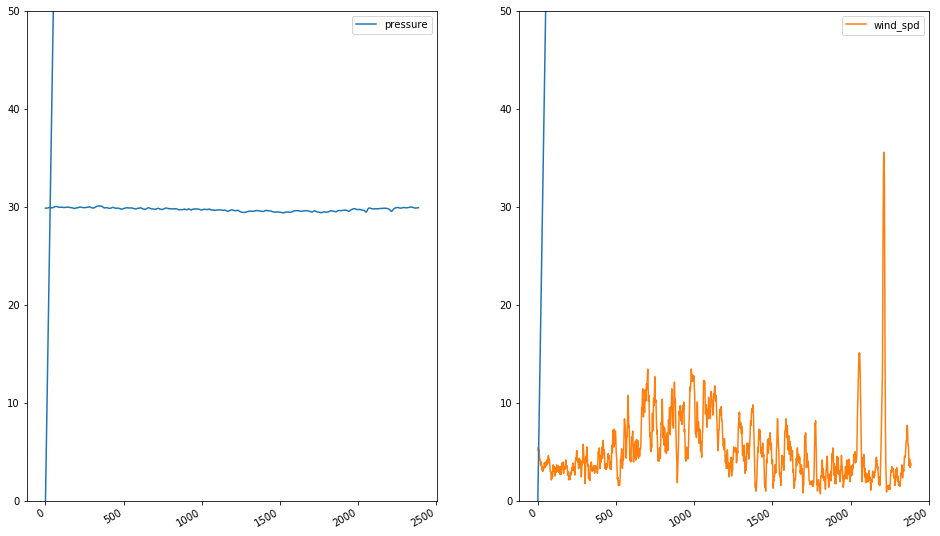

In [66]:
plt.rcParams["figure.figsize"] = (25,10)
ax = data[['pressure','wind_spd']].plot(subplots=True, layout=(1,3), ylim=[0,50])

for axe in ax[0]:
    axe.plot(data.index)

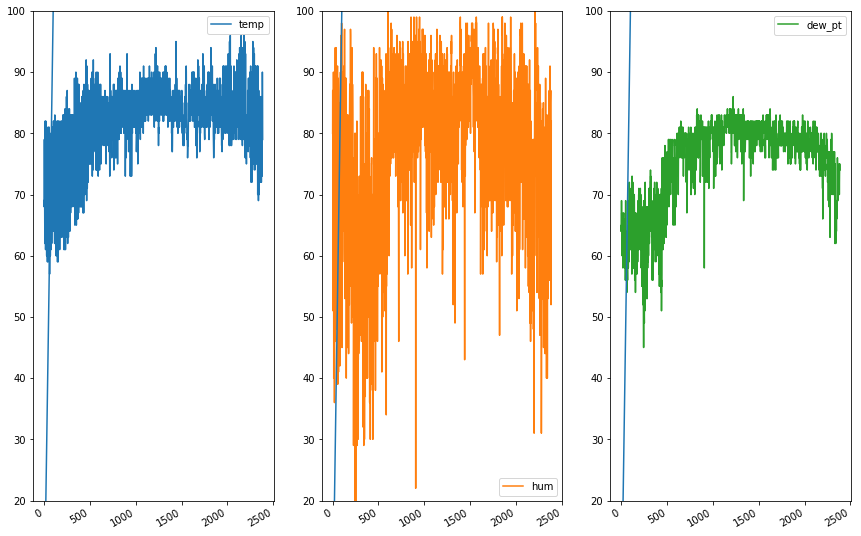

In [67]:
ax = data[['temp','hum','dew_pt']].plot(subplots=True, layout=(1,5), ylim=[20,100])

for axe in ax[0]:
    axe.plot(data.index)

In [68]:
data['rain']= data['rain'].astype('category',copy=False)
data['vis']= data['vis'].astype('category',copy=False)
data_without_date=data.drop(axis=0,columns='date')
data_without_date.head()
data_without_date.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,2386.0,81.512992,6.284189,57.000,79.000000,82.000000,86.000000,96.000000
dew_pt,2386.0,75.326907,6.912724,45.000,72.250000,78.000000,80.000000,86.000000
hum,2386.0,77.823135,13.678601,15.000,70.000000,81.000000,88.000000,100.000000
wind_spd,2386.0,5.175296,3.373453,0.675,3.075000,4.275000,6.516667,35.566667
pressure,2386.0,29.727110,0.166535,29.365,29.589091,29.747917,29.868125,30.088333


In [69]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
for i in data_without_date.columns:
    if not (i == 'rain' or i=='vis'):
        data_without_date[i] = st.fit_transform(data_without_date[i].values.reshape(-1,1))
    else:
        pass

c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\apt

In [70]:
data_without_date.head()

,temp,dew_pt,hum,wind_spd,vis,pressure,rain
0,-1.991604,-1.638903,0.159177,0.056740,1,0.788123,0
1,-2.150767,-1.494212,0.671033,0.024267,1,0.798133,0
2,-1.673278,-1.638903,-0.498923,-0.000088,1,0.805640,0
3,-0.399975,-0.915447,-1.010778,-0.019030,2,0.791460,0
4,-0.399975,-1.638903,-1.961367,-0.034184,2,0.774109,0


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_without_date.drop(['rain'] , axis=1), data_without_date['rain'], test_size=0.2, random_state=42 )

In [72]:
data_without_date.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,2386.0,-7.385356e-16,1.00021,-3.901559,-0.399975,0.077514,0.714165,2.305794
dew_pt,2386.0,9.529492e-17,1.00021,-4.388034,-0.445201,0.386773,0.676155,1.544302
hum,2386.0,8.338305e-17,1.00021,-4.593767,-0.572045,0.232299,0.744155,1.621621
wind_spd,2386.0,0.000000e+00,1.00021,-1.334312,-0.622726,-0.266933,0.397709,9.010870
pressure,2386.0,-3.025614e-14,1.00021,-2.174831,-0.828944,0.124962,0.846932,2.169500


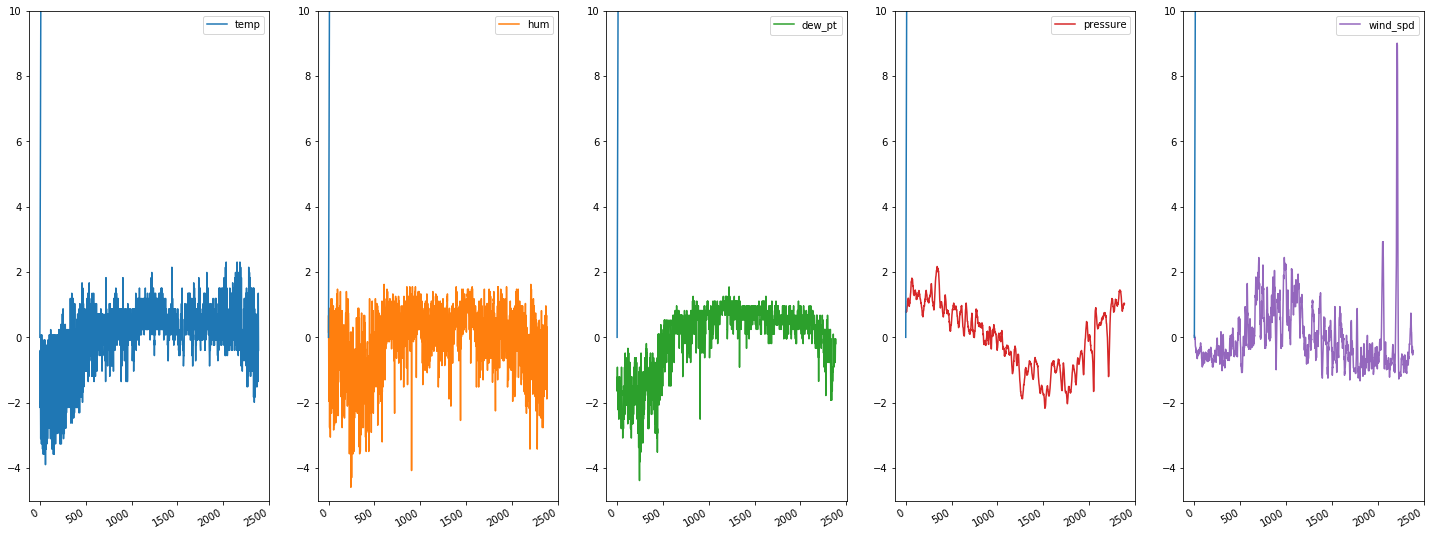

In [73]:
ax = data_without_date[['temp','hum','dew_pt','pressure','wind_spd']].plot(subplots=True, layout=(1,5), ylim=[-5,10])

for axe in ax[0]:
    axe.plot(data_without_date.index)

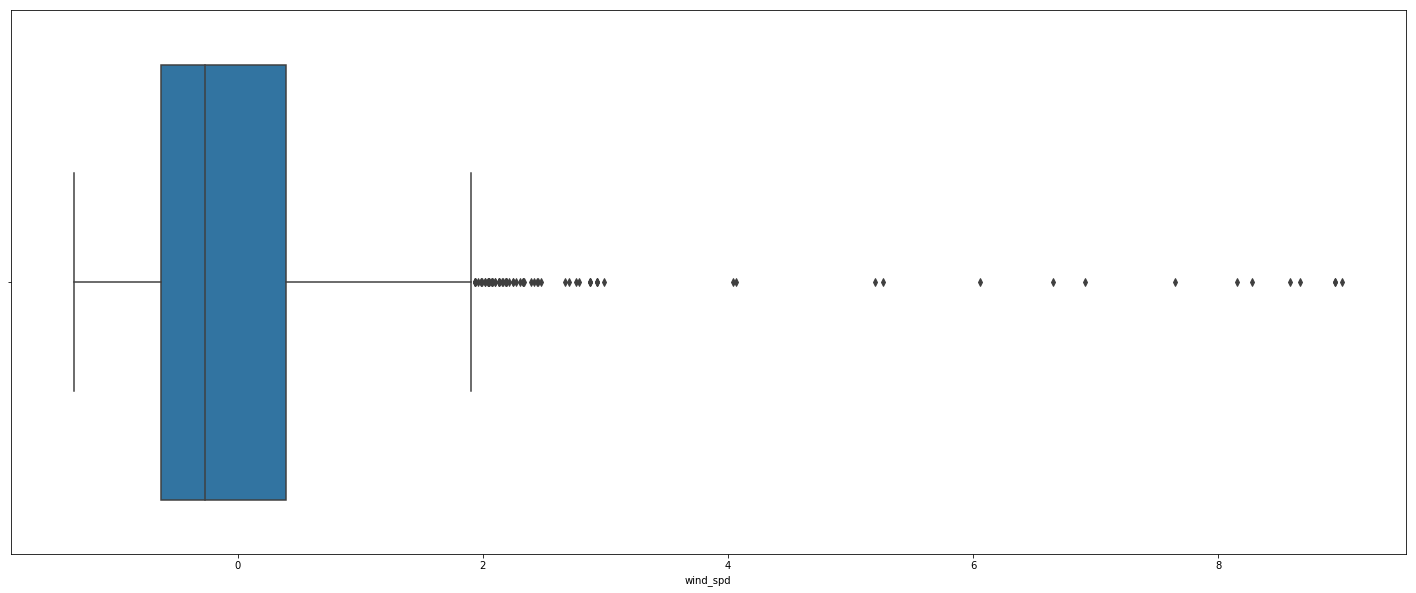

In [74]:
sns.boxplot(x=data_without_date['wind_spd'])

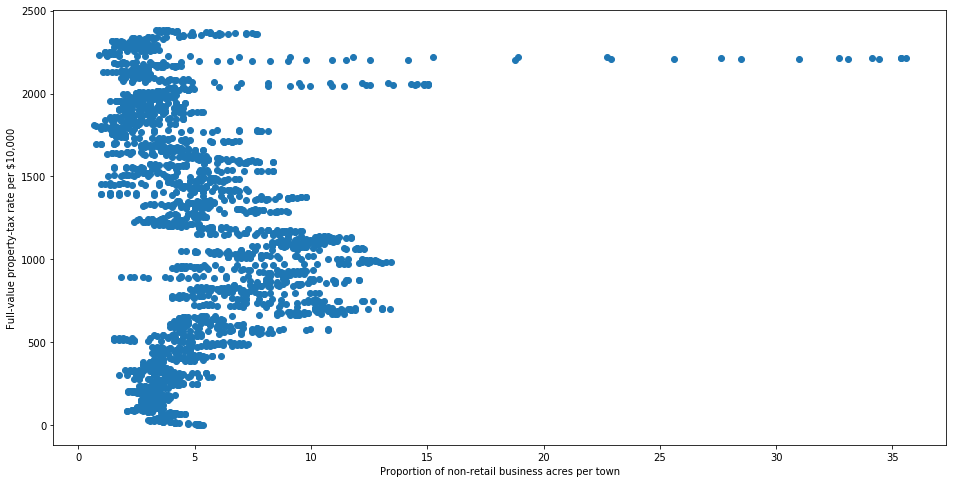

In [75]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['wind_spd'],data_without_date.index)
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [76]:
# Q1=data.quantile(0.25)
# Q3=data.quantile(0.75)
# IQR=Q3-Q1
# data.shape
# data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR)))]
#IQR

In [77]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
ypredict = nb.predict(X_test)
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test , ypredict))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       452
           1       0.29      0.85      0.43        26

   micro avg       0.88      0.88      0.88       478
   macro avg       0.64      0.86      0.68       478
weighted avg       0.95      0.88      0.90       478



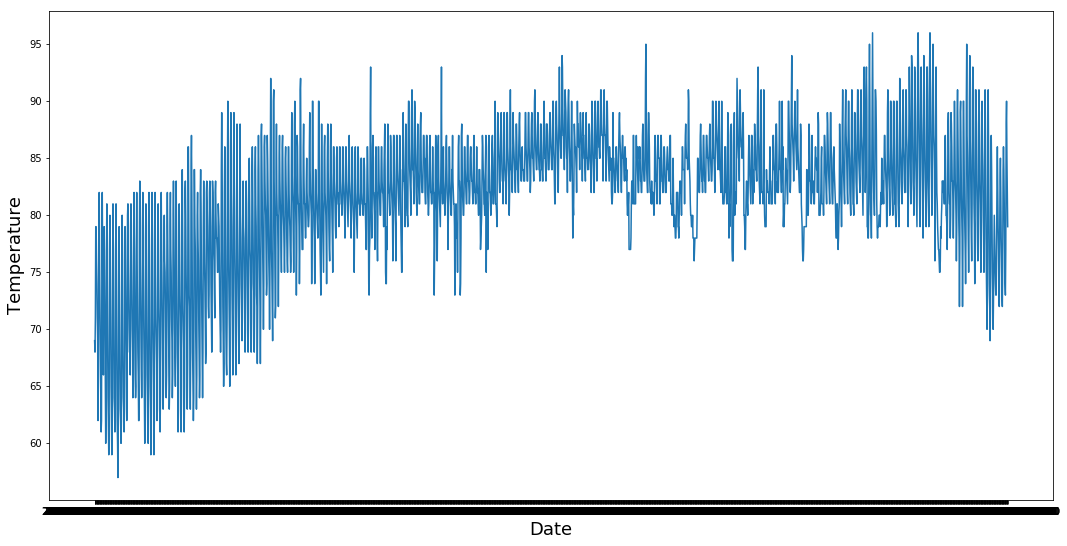

In [79]:
plt.figure(figsize = (18,9))
plt.plot(data['date'],data['temp'])
#plt.xticks(range(0,df.shape[0],500),['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Temperature',fontsize=18)
plt.show()


In [80]:
series_temp=data['temp'][:2000]
series_hum=data['hum'][:2000]
series_dew_pt=data['dew_pt'][:2000]
series_pressure=data['pressure'][:2000]
series_wind_spd=data['wind_spd'][:2000]

In [55]:
model = ARIMA(series_temp, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\scipy\signal\signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\scipy\signal\signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\scipy\signal\signaltools.py:1342: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

                             ARIMA Model Results                              
Dep. Variable:                 D.temp   No. Observations:                 1999
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4925.039
Method:                       css-mle   S.D. of innovations              2.841
Date:                Thu, 07 Mar 2019   AIC                           9864.077
Time:                        12:41:09   BIC                           9903.280
Sample:                             1   HQIC                          9878.472
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0061      0.028      0.219      0.826      -0.048       0.060
ar.L1.D.temp     0.1089      0.020      5.572      0.000       0.071       0.147
ar.L2.D.temp    -0.4521      0.019    -23.43

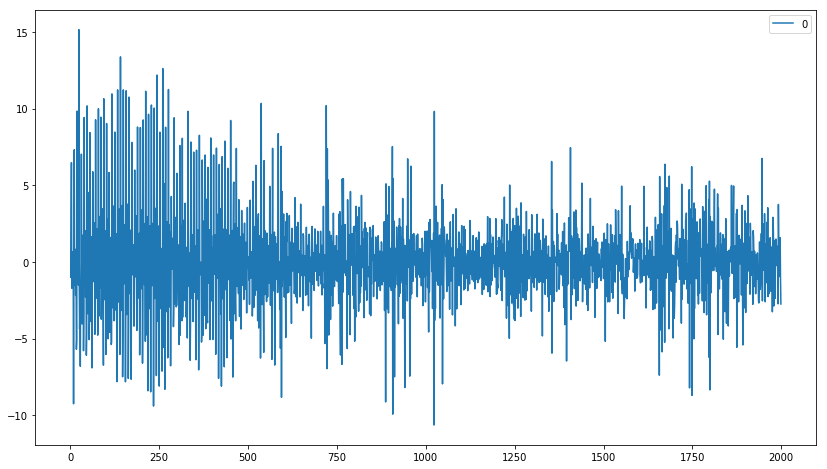

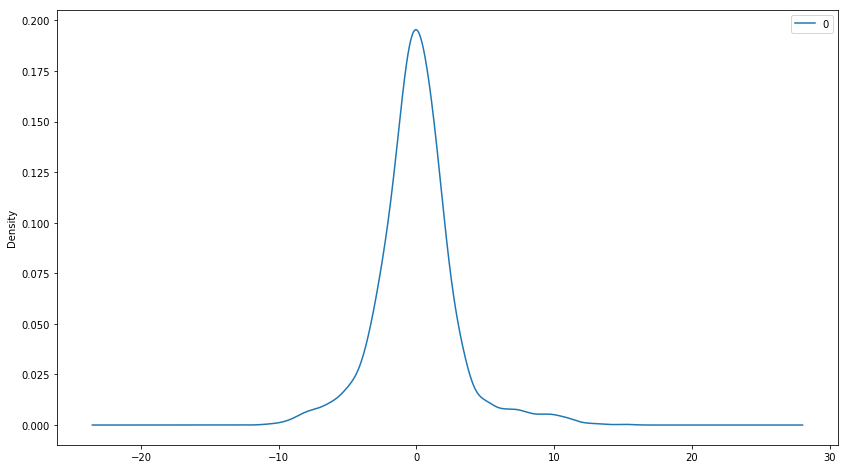

                 0
count  1999.000000
mean      0.002741
std       2.843730
min     -10.642092
25%      -1.400586
50%      -0.046824
75%       1.279537
max      15.142684


In [56]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

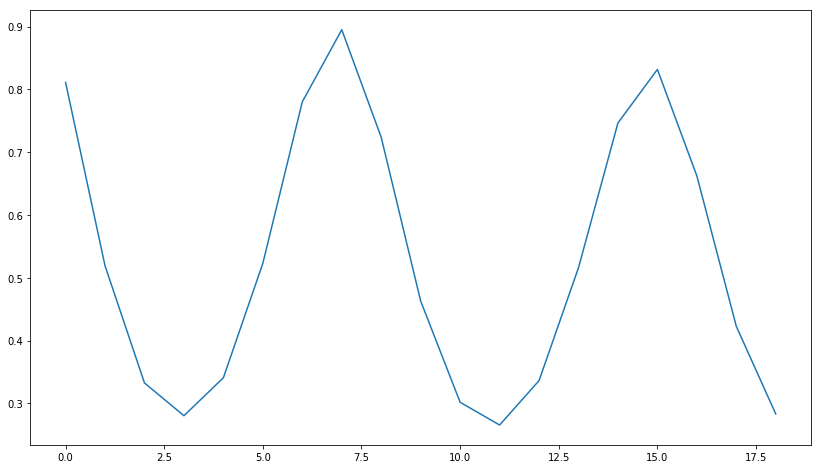

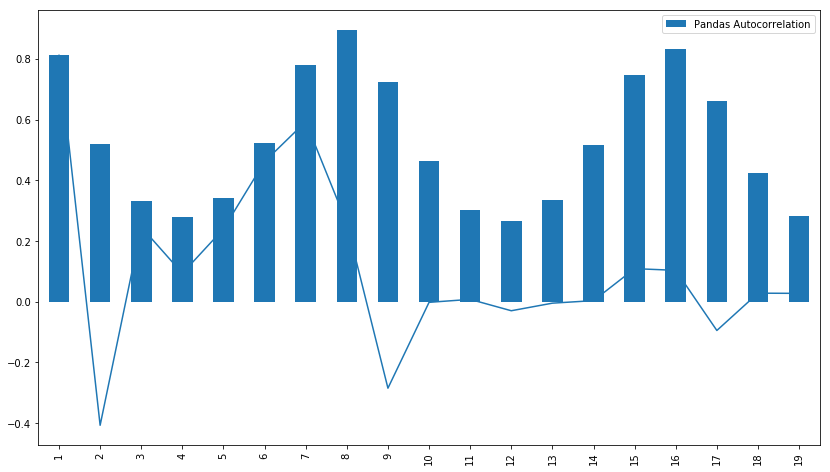

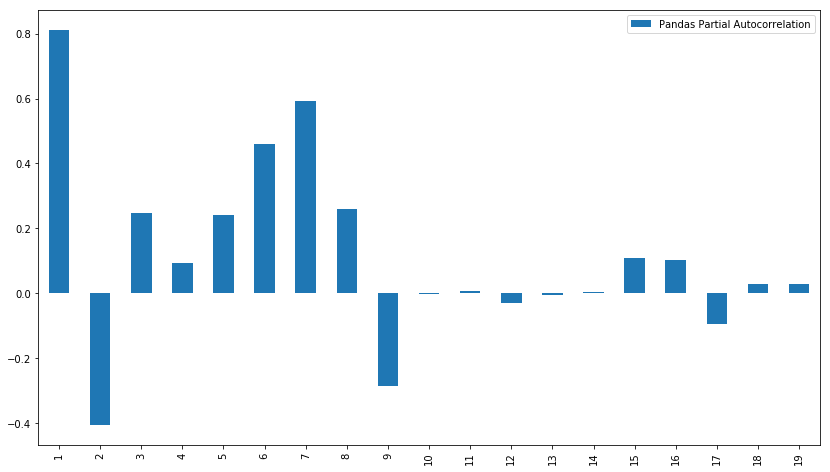

In [57]:
plt.plot(figsize=(8,8))
from statsmodels.tsa.stattools import acf, pacf
acf_1 = acf(series_temp)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 = pacf(series_temp)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')

In [65]:
def evaluate_arima_model(X, arima_order):
for t in range(len(X_test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    #history.append(test[t])
# calculate out of sample error
error = mean_squared_error(test, predictions)
return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    print("Grid Search in progress")
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    print(mse)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(series_temp, p_values, d_values, q_values)

Grid Search in progress
Best ARIMANone MSE=inf


In [325]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow_internal', [dirname(__file__)])
  File "c:\users\aptus\appdata\local\programs\python\python36-32\lib\imp.py", line 297, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow_internal'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\aptus\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 20, in swig_import_helper
    import _pywrap_tensorflow_internal
ModuleNotFoundError: No module named '_pywrap_tensorflow_internal'


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [244]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model.fit(X, y, epochs=1000, verbose=0)